In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
#dataset = load_dataset('lukebarousse/data_jobs')
#df = dataset['train'].to_pandas()

df = pd.read_csv("C:/Users/ishaa/Downloads/job_postings_flat.csv")

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_US = df[df['job_country'] == 'United States']

In [4]:
df_skills = df_US.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Data Analyst,sql
0,Data Analyst,snowflake
0,Data Analyst,visio
0,Data Analyst,jira
0,Data Analyst,confluence
...,...,...
1615905,Staff Data Engineer II,c++
1615905,Staff Data Engineer II,aws
1615905,Staff Data Engineer II,hadoop
1615905,Staff Data Engineer II,spark


In [10]:
df_skills_count= df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1321,python,Data Scientist,76602
1645,sql,Data Analyst,67986
1646,sql,Data Engineer,56933
503,excel,Data Analyst,55191
1320,python,Data Engineer,55159
...,...,...,...
2028,zoom,Cloud Engineer,1
2011,wrike,Data Scientist,1
526,fastapi,Cloud Engineer,1
1999,workfront,Cloud Engineer,1


In [11]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

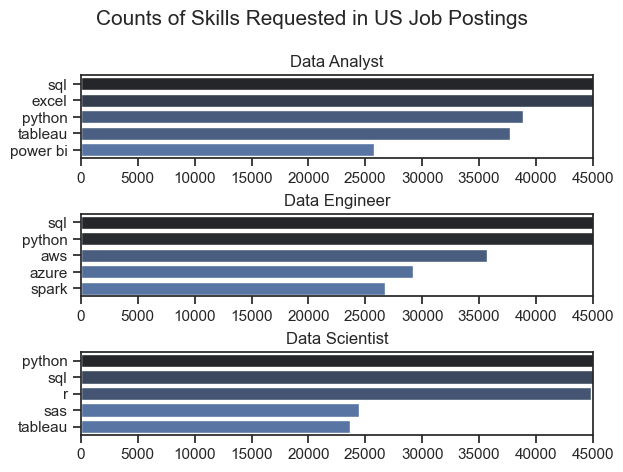

In [14]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 45000) # make the scales the same

fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

In [15]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [16]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['jobs_total']

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,76602,115605,66.261840
1,sql,Data Analyst,67986,152726,44.515014
2,sql,Data Engineer,56933,88309,64.470213
3,excel,Data Analyst,55191,152726,36.137265
4,python,Data Engineer,55159,88309,62.461357
...,...,...,...,...,...
2032,zoom,Cloud Engineer,1,1576,0.063452
2033,wrike,Data Scientist,1,115605,0.000865
2034,fastapi,Cloud Engineer,1,1576,0.063452
2035,workfront,Cloud Engineer,1,1576,0.063452


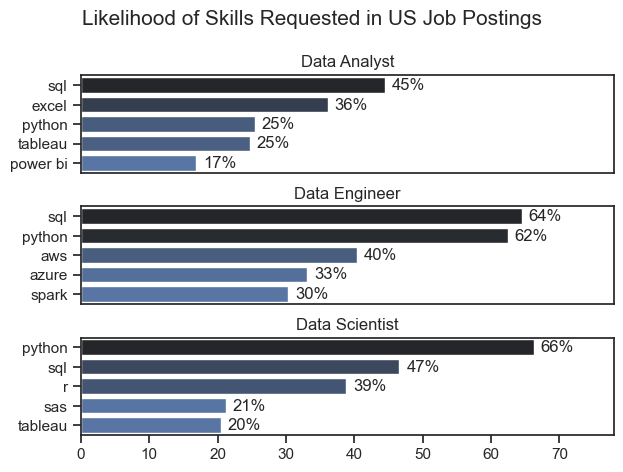

In [17]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()